# Exploratory data analysis on wine quality and its contains

### Importing required libraries for the EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Importing the data set  which consist of Wine quality data sets

In [2]:

data=pd.read_csv('D:Kaggle/winequalityN.csv')
data=pd.DataFrame(data)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Getting the information of Datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data['type'].isnull().count()
data.isna().sum()/100

type                    0.00
fixed acidity           0.10
volatile acidity        0.08
citric acid             0.03
residual sugar          0.02
chlorides               0.02
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
pH                      0.09
sulphates               0.04
alcohol                 0.00
quality                 0.00
dtype: float64

## There are total type of wine distributions are
### white    4898
### red      1599

### Null value consisting in the dataset 

<AxesSubplot: ylabel='count'>

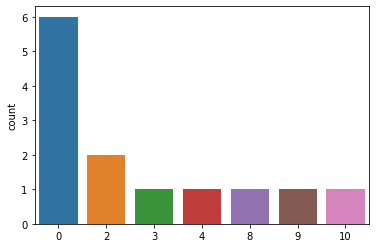

In [5]:
sns.countplot(x =data.isna().sum(), data = data)

In [6]:
#filling null value by default mean value after the complete case analysis
df=data.fillna(value='data')
df.head(4)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3,0.45,8.8,6
1,white,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940,3.3,0.49,9.5,6
2,white,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6


## It show the that the quality of the both the type of wine have max approx similar quality

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='quality', ylabel='Density'>

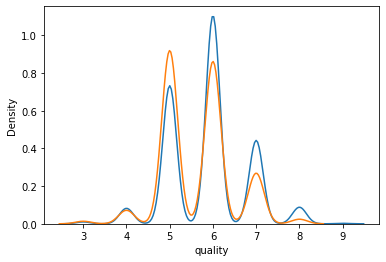

In [7]:
sns.distplot(df[df['type']=='white']['quality'],hist=False)
sns.distplot(df[df['type']=='red']['quality'],hist=False)
#it show the that the quality of the both the type of wine have max approx similar quality

## Checking the correlation of the given columns 

###  It only include numerical numerical dataset not the cateroical dataset it show that the free sulfur dioxide and total sulfur dioxide have strong correlation , where as it show negative relation with the alcohol so that it suggest that the free sulfur di oxide is nearly at very small quantity is found in the alcohol of same type of analysize with the different column can be also be made based on reseaerch

In [8]:
df.corr()

,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
free sulfur dioxide,1.000000,0.720934,0.025717,-0.179838,0.055463
total sulfur dioxide,0.720934,1.000000,0.032395,-0.265740,-0.041385
density,0.025717,0.032395,1.000000,-0.686745,-0.305858
alcohol,-0.179838,-0.265740,-0.686745,1.000000,0.444319
quality,0.055463,-0.041385,-0.305858,0.444319,1.000000


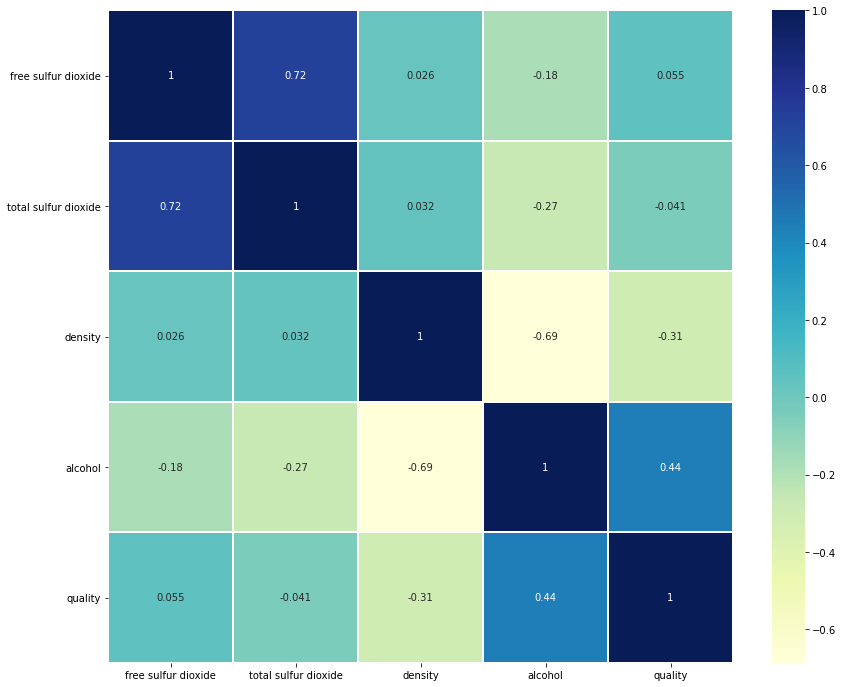

In [9]:
#visualizing the correlation of the dataset through heat map
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);



In [13]:
#a higher density of alcohol establishments means more availability of alcohol is present  there


## A pairs plot allows us to see both distribution of single variables and relationships between two variables.

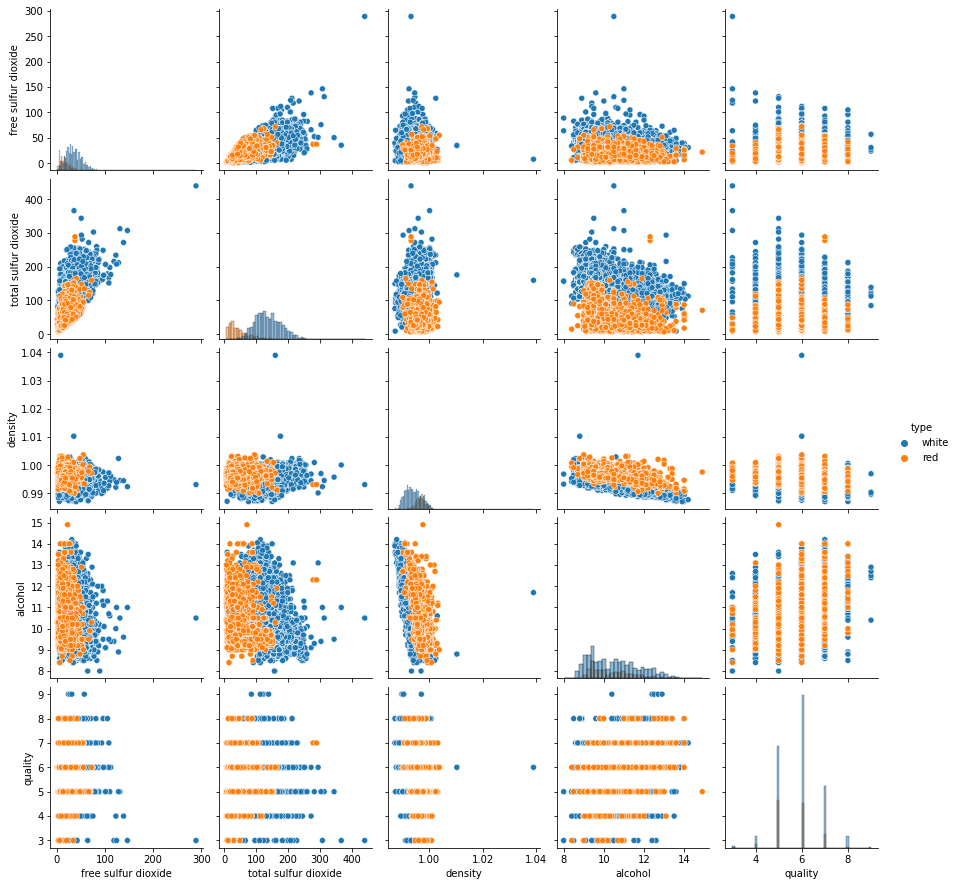

In [14]:
sns.pairplot(df,hue="type", diag_kind="hist")